In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import os

import sys
sys.path[0] = ".."

In [2]:
import math
import torch
import gpytorch

In [3]:
from bo.gp import GP, train_gp

#### Create datasets with categorical inputs

Features for categorical inputs are obtained through one-hot encoding. We can express transformed overlap kernel as a function of the features $\phi_{i,j}$ for $i\in \{1,...,d\}$ and $j \in \{1, ..., \#\text{cat}\}$:

$$K(x, x') = f(\sum_i \lambda_i \delta(x_i, x'_i))= f(\sum_i \frac{\lambda_i}{2} \sum_j |\phi_{i,j}(x) - \phi_{i, j}(x^\prime)|= f(\sum_{i,j} \lambda_{i,j} |\phi_{i,j}(x) - \phi_{i, j}(x^\prime)|)$$
where $\phi_{i,j}(x) = \delta(x_i, j)$ and $\lambda_{i, j} = \lambda_i / 2$.


In [86]:
n_train = 300
n_cat = 20
dim = 11

train_x = torch.randint(0, n_cat, size=(n_train, dim))
train_y = torch.randn(n_train, 1)

##### Create and train the model GP model with transformed overlap kernel

In [87]:
# initialize likelihood and model
model = train_gp(train_x.float(), train_y.flatten().float(), use_ard=True, num_steps=200)

##### Compute Local and averaged global feature gradients for the training points 
Computation can take up to 1~2 minutes

In [88]:
# Local gradients
dmu_dphi = model.dmu_dphi(num_cats=n_cat)
print(dmu_dphi.shape)

# global averaged gradient
ag, ev = model.ag_ev_phi(num_cats=n_cat, dmu_dphi=dmu_dphi, n_samples_threshold=10)
print(ag.shape, ev.shape)

/home/rladmin/antoineg/Projects/antigenbinding2/notebooks/../bo/gp.py:96: UserWarning: Warning: model was not in eval mode. It is now.
  
/home/rladmin/anaconda3/envs/rnaopt/lib/python3.8/site-packages/gpytorch/models/exact_gp.py:273: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


##### Visualise influence magnitude
We omit influence magnitude of some features if not enough samples have them.

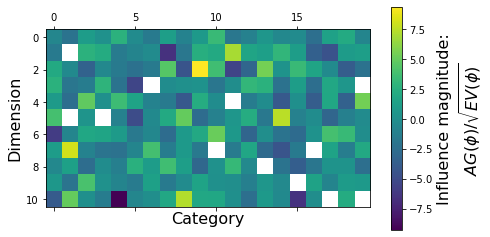

In [99]:
plt.matshow(ag / ev.sqrt())
plt.xlabel("Category", fontsize=16)
plt.ylabel("Dimension", fontsize=16)
cax = plt.colorbar()
cax.set_label("Influence magnitude:\n" + r"$AG(\phi) / \sqrt{EV(\phi)}$", fontsize=16)
plt.show()